In this we project we are trying to understand RAW Amazon dataset downloaded from Kaggle.

INITIALIZATION

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

SHAPE OF THE DATA AND ITS ATTRIBUTES

In [2]:
#lOADING DATASET
url = 'https://drive.google.com/uc?id={}'.format('1PgXFfdwcvq7ESB_sShASvPhariXNtdhB')
df = pd.read_csv(url,encoding = "latin1")
 #due to special charas should be encoded as latin 1
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#TOTAL ROWS AND COLUMNS
n_reviews, n_attributes = df.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)


Total Reviews:  2501
Total Attributes:  32


There in total 2501 reviews and each of them with 32 columns with in the dataset. With this we need to take a deeper look into each column to filter out the useful data.

In [4]:
#INFORMATION ON THE LOADED CSV FILE. COVERS COLUMN NAMES, TOTAL ROWS AND COLUMS, DATA TYPES AND THE MEMORY USAGE.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   report_date             2501 non-null   object 
 1   online_store            2501 non-null   object 
 2   upc                     2501 non-null   float64
 3   retailer_product_code   2501 non-null   object 
 4   brand                   2501 non-null   object 
 5   category                2501 non-null   object 
 6   sub_category            2501 non-null   object 
 7   product_description     2501 non-null   object 
 8   review_date             2501 non-null   object 
 9   review_rating           2501 non-null   int64  
 10  review_title            2403 non-null   object 
 11  review_text             2501 non-null   object 
 12  is_competitor           2501 non-null   int64  
 13  manufacturer            2501 non-null   object 
 14  market                  2501 non-null   

## Understanding the data
1.report_date: when the data was extracted initially. From a quick glance, most were collected from the year 2019.

2.online_store: The name of the store in which these reviews have been placed.

3.upc: The Universal Product Code (UPC) is a barcode symbology that is commonly used to monitor trade products in retailers across the world. Each trade item is issued a unique UPC, which is made up of 12 numeric digits.

4.retailer_product_code: Product identifier from the retailer's side.

5.brand: The brand of the product being sold.

6.category: the general category of the product e.g foods

7.sub_category: the category which describes the category the product is under: category= food, sub-category=savoury

8.product_description: description of the product in detail to provide more clarity on the product

9.review_date: date when the review is posted.

10.review_rating: rating given by the reviewer on the product. Determines the overall score of the review itself, given to the product supposedly purchased. Scale is from 1 - 5, 1 being very poor and 5 being excellent.

11.review_title: title given to the review written.

12.review_text: the actual review itself, explaining the product supposedly bought by the customer

13.is_competitor: whether the prodcut is a competitor or not. Futher analysis should be conducted to understand this column further.

14.manufacturer: the manufacturer of the product.
market: where these products and stores are situated. To understand this further, needs to be taken deeper look.

15.matched_keywords: from the dataset, this cannot be derived, since all of the values within this column appears to be NULL.
time_of_publication: from the dataset, this cannot be derived, since all of the values within this column appears to be NULL.

16.url: url of the review itself.
review_type: indicates the review type. research for more information

17.parent_review: indicates whether the review is parent or a child.

18.manufacturers_response:

19.dimension 1 - 8: miscellenous information on the product itself. There are several missing values within these columns, which will be verified later on.

20.verified_purchase: whether the reviews written has been verified or not by Amazon's system.

21.helpful_review_count: how many indivudual have found the review to be helpful

22.review_hash_id: unique identifier of the review.

In [5]:
#DISPLAY DATAFRAME
df.head()

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,review_title,review_text,is_competitor,manufacturer,market,matched_keywords,time_of_publication,url,review_type,parent_review,manufacturers_response,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,1/2/2019,FRESHAMAZON,8.718110e+12,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,1/1/2019,5,Dove Men s + Deodorant,"As you get older, you know what you like and w...",0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RE...,Organic,Child,NaN,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,1/3/2019,FRESHAMAZON,5.000180e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R1...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,1/3/2019,FRESHAMAZON,5.000180e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,1/2/2019,4,Vitamin B12.,Excellent,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RD...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,1/3/2019,FRESHAMAZON,8.712570e+12,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R2...,Organic,Parent,NaN,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,1/3/2019,FRESHAMAZON,8.717160e+12,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,1/2/2019,5,Very handy,Does what is says it does,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RJ...,Organic,Parent,NaN,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


## STATISTICS
The statistical analysis of the data gives us with information such as max, min and average value for numerical data.

In [6]:
#NON-OBJECTS
df.describe()

,upc,review_rating,is_competitor,matched_keywords,time_of_publication,manufacturers_response,dimension4,dimension5,dimension6,helpful_review_count
count,2.501000e+03,2501.000000,2501.0,0.0,0.0,0.0,0.0,0.0,0.0,2501.000000
mean,7.632298e+12,4.456218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.231507
std,2.108171e+12,1.108595,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.953930
min,4.218266e+07,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,8.710450e+12,4.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8.710450e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,8.712560e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,8.722700e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


1. Average review-rating for this dataset is 4.4 which indicates that most of the reviews within this dataset happens to be positive. The min rating is 1 and the max is 5, 1 being very poor and 5 being excellent.
2. The average helpful review count is 0.2 which indicates that most of the reviews within this dataset has not had a helpful review count given to them.
3. UPC is a unique identifier, and hence will be ignored in this summary stats
3. is_competitor column displays that there happens to be no values indicating that there is anything flagged as a competitor. This can be confirmed by both the min and max values being 0, and hence the average value being 0.
4. matched_keywords, time_of_publication, manufacturers_response, dimension4, dimension5, dimension6 all have NULL values entirely

In [7]:
df.describe(include=object)

,report_date,online_store,retailer_product_code,brand,category,sub_category,product_description,review_date,review_title,review_text,manufacturer,market,url,review_type,parent_review,dimension1,dimension2,dimension3,dimension7,dimension8,review_hash_id
count,2501,2501,2501,2501,2501,2501,2501,2501,2403,2501,2501,2501,1654,2501,2501,2501,2501,2310,2499,2501,2501
unique,133,9,367,35,4,16,219,144,1244,1622,1,1,1571,2,2,16,106,94,15,1,2501
top,5/26/2019,AMAZON,B077YLQ2R1,Comfort,Personal Care,Laundry,Simple x Little Mix Micellar Cleansing Wipes 2...,2/19/2019,Great value,Good,Unilever Global,UK,https://www.sainsburys.co.uk/shop/gb/groceries...,Organic,Parent,Laundry,COTC Fabric Conditioner,COTC Fabric Conditioner,Retailer Core of the Core,Core of the Core,3f129b02-ea76-0323-bd59-235d97a4f83f
freq,217,1102,97,480,1182,993,108,70,48,25,2501,2501,52,1936,1800,993,326,276,1281,2501,1


In [8]:
df["review_type"].value_counts(normalize=True).to_frame()

,review_type
Organic,0.77409
Syndicated,0.22591


In [9]:
df["parent_review"].value_counts(normalize=True).to_frame()

,parent_review
Parent,0.719712
Child,0.280288


In [10]:
df["review_date"].value_counts().to_frame()

,review_date
2/19/2019,70
1/26/2019,49
2/1/2019,47
2/20/2019,46
5/1/2019,40
2/26/2019,39
1/31/2019,38
2/18/2019,36
1/14/2019,36
1/27/2019,35


In [11]:
df["report_date"].value_counts().to_frame()

,report_date
5/26/2019,217
2/28/2019,201
5/27/2019,134
3/25/2019,122
3/21/2019,81
2/22/2019,56
5/23/2019,55
3/22/2019,50
2/8/2019,39
3/24/2019,37


In [12]:
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

sub_category
category      sub_category                               
Foods         Dressings                                36
              Ice Cream                                39
              Other Foods                              16
              Savoury                                 100
Homecare      HHC                                      27
              Household Care                           30
              Laundry                                 993
Personal Care Deodorants & Fragrances                 125
              Deos                                    100
              Hair                                    108
              Hair Care                                77
              Personal Care                            22
              Skin Care                               476
              Skin Cleansing                          274
Refreshment   Ice Cream                                70
              Tea                                       3
              Tea and Soy & Fruit Beverages             5

The sub-categories are grouped by categories.We can observe that many sub-categories are overlapping which leads to confusion.

In [13]:
#CHANGING THE CATEGORIES AND SUB-CATEGORIES
df.loc[df.sub_category == "Ice Cream", "category"] = "Refreshment"
df.loc[df.sub_category == "HHC", "sub_category"] = "Household Care"
df.loc[df.sub_category == "Deos", "sub_category"] = "Deodorants & Fragrances"
df.loc[df.sub_category == "Tea", "sub_category"] = "Tea and Soy & Fruit Beverages"
#df.loc[(df['sub_category'] == "Hair Care") & (df['category'] == "Personal Care")]
df.loc[df.sub_category == "Hair Care", "sub_category"] = "Hair"
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

sub_category
category      sub_category                               
Foods         Dressings                                36
              Other Foods                              16
              Savoury                                 100
Homecare      Household Care                           57
              Laundry                                 993
Personal Care Deodorants & Fragrances                 225
              Hair                                    185
              Personal Care                            22
              Skin Care                               476
              Skin Cleansing                          274
Refreshment   Ice Cream                               109
              Tea and Soy & Fruit Beverages             8

The data has been sorted in way that it can be used for EDA analysis.

In [14]:
df["online_store"].value_counts().to_frame()

,online_store
AMAZON,1102
AMAZONPRIMEPANTRY,389
BOOTS,378
SUPERDRUG,188
OCADO,168
SAINSBURYS,123
ASDA,109
FRESHAMAZON,40
MORRISONS,4


Most of the reviews come from amazon and its brands.

In [15]:
#CHECKING THE NUMBER OF NULL VALUES ACROSS THE DATASET
df.isnull().sum()

report_date                  0
online_store                 0
upc                          0
retailer_product_code        0
brand                        0
category                     0
sub_category                 0
product_description          0
review_date                  0
review_rating                0
review_title                98
review_text                  0
is_competitor                0
manufacturer                 0
market                       0
matched_keywords          2501
time_of_publication       2501
url                        847
review_type                  0
parent_review                0
manufacturers_response    2501
dimension1                   0
dimension2                   0
dimension3                 191
dimension4                2501
dimension5                2501
dimension6                2501
dimension7                   2
dimension8                   0
verified_purchase            0
helpful_review_count         0
review_hash_id               0
dtype: i

1. Columns such are matched_keywords, time_of_publication, manufactures_responce,dimensions4-6 contain all null values so the can be ignored and removed.
2. URL has 847 null values, as url have no significant impact in our analysis they can be also ignored.
3. There are no null values in the columns such as review data, review text, and review rating.


In [16]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0



There is a lack of behavioral attributes in relation to the reviews itself. There is no information regarding the author, the time of the review written, the collection of the reviews written by the same author, and hence behavioral context cannot be utlized to determine the fake reviews of this project.

## TEXTUAL ATTRIBUTES

In [17]:
#TEXTUAL ATTRIBUTES
cols = ['review_date','review_title', 'review_text','review_rating','verified_purchase']
textual_attributes = df[cols]
pd.DataFrame(textual_attributes).head()

,review_date,review_title,review_text,review_rating,verified_purchase
0,1/1/2019,Dove Men s + Deodorant,"As you get older, you know what you like and w...",5,True
1,1/2/2019,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,5,True
2,1/2/2019,Vitamin B12.,Excellent,4,True
3,1/2/2019,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,5,True
4,1/2/2019,Very handy,Does what is says it does,5,False


There are textual attributes available within this dataset, and on top of that there are no NULL values within them as displayed above, and hence textual attributes can be used to understand the textual context of these reviews, so by the time we are building the classifier, we have a better undersranding on the review data itself.

Essentially the textual attributes can aid us in approaching the problem in a linguistic features fashion, where The linguistic feature considers review text to identifythe reviews as fake vs truth

The attributes above will be used to further our understanding in our EDA process.

## EXPLORATORY DATA ANALYSIS

In [18]:
#SETTING SEABORN STYLE
sns.set_style('darkgrid')

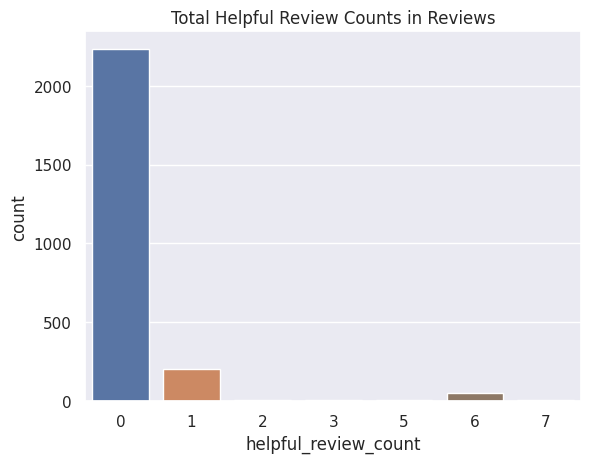

In [19]:
#COUNTPLOT ON TOTAL HELPFUL_REVIEW_COUNTS
sns.countplot(x ='helpful_review_count',
              data = df).set_title("Total Helpful Review Counts in Reviews")
plt.show()

In general, Number of helpful review count can helpful us understand which reviews have helped customer in making the buying decision for the customers. Here the value of helpful reviews is so low that we can't use it in our analysis.

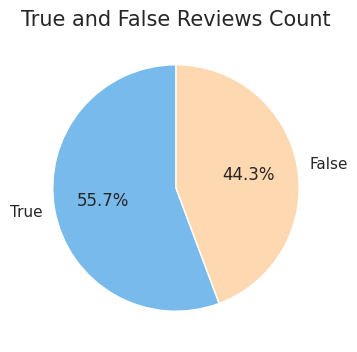

In [20]:
#PIE CHART ON VERFIED PURCHASES - check one
colors = ['#79BAEC','#FED8B1']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Verified_purchases column is the target variable for this project. From the countplot above, it can be seen that there are near equal parts of true VP and false VP (56% and 44% respectively).

Amazon has provided their solution to combat fake reviews by implementing this column, Verified Purchases, where the reviewer has to go through a series of verification steps to ensure that the review that they are placing has indeed been bought from the site. This is Amazon's answer to combating fake reviews, and thus provides security on the truthfulness of the reviews since the review has been placed after purchasing the products.

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

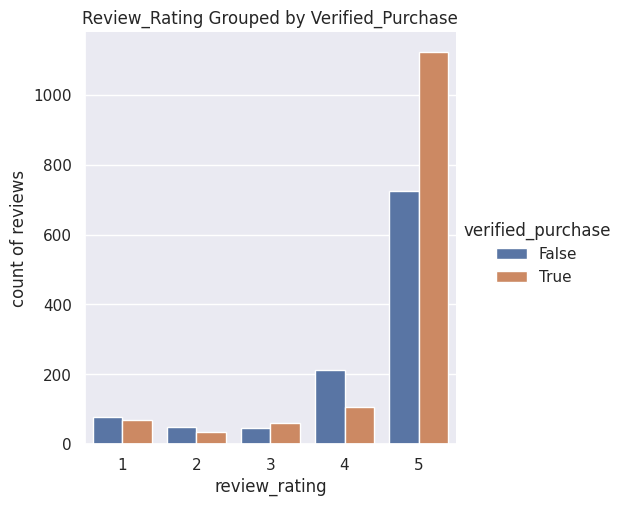

In [21]:
#COUNTPLOT OF REVIEW RATING GROUPED BY VERIFIED PURCHASE
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase",
            data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

According to previous literature, fake reviews refer to reviews that demote/promote a product without any necessary experience with the said service/product.

Referring to the graph, it can be observed that False VP has the higest amount of 5 rating compared to its 1 rating, indicating that the fake reviews has been used to promote the product without the purchase. This is usually done to boost the ratings up of the product. It can also be observed that the True Vp has the highest 5 rating compared to the False.

When we take a look at the 1 star rating, the False VP happen to be more than the True VP, which can indicate that the reviews were trying to demote the said product, again without previous purchase.

Overall, it can be seen that majority of the ratings within this dataset to be positive, and hence should be kept in mind whilst proceeding with the model building.



Text(0.5, 1.0, 'Count of Product Categories')

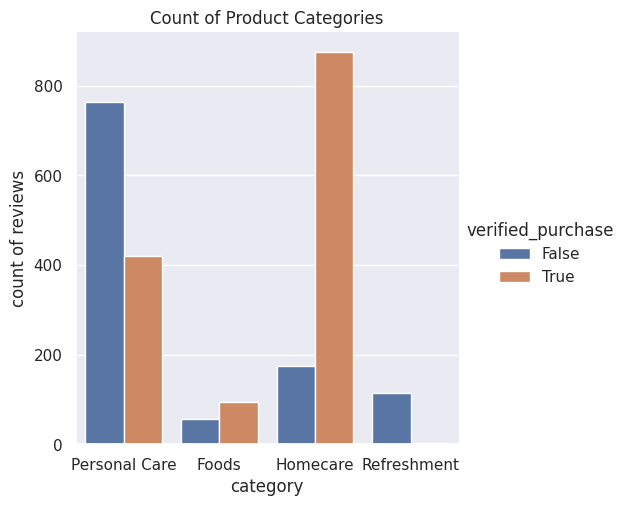

In [22]:
sns.catplot(x ='category',kind="count", hue = "verified_purchase", data=df)
plt.xlabel("category")
plt.ylabel("count of reviews")
plt.title("Count of Product Categories")

Text(0.5, 1.0, 'Count of Product Sub Categories')

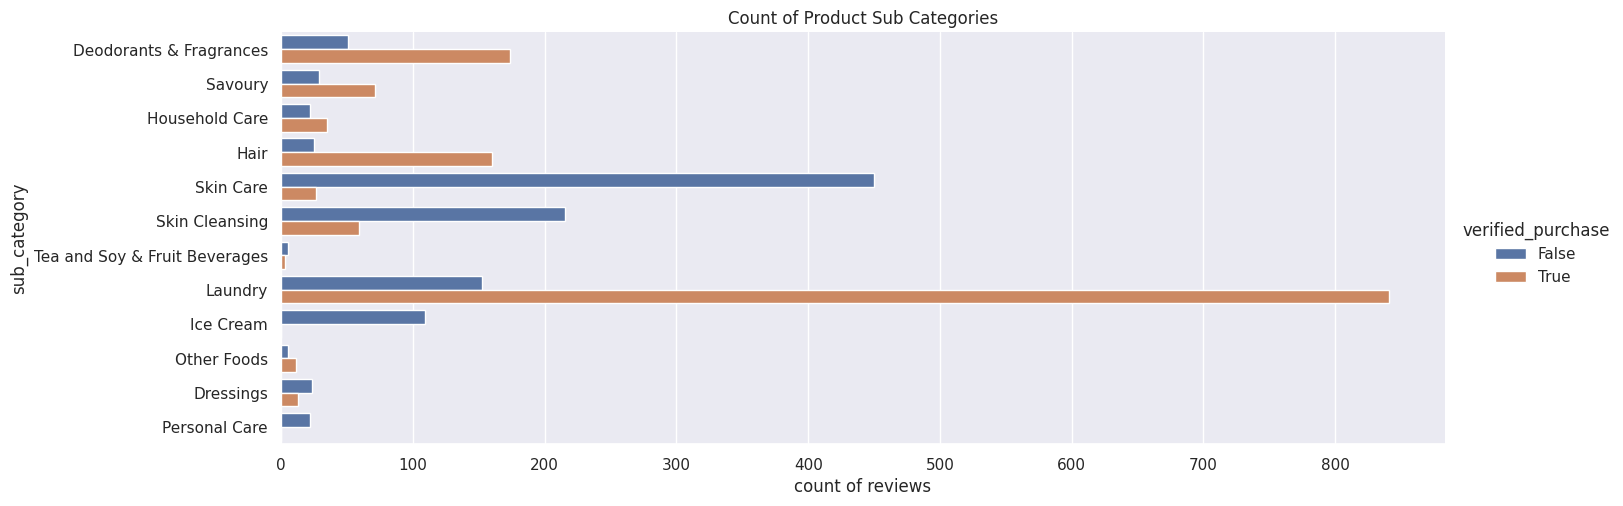

In [23]:
sns.catplot(y ='sub_category',kind="count", hue = "verified_purchase", data=df,  height=5, aspect=3)
plt.ylabel("sub_category")
plt.xlabel("count of reviews")
plt.title("Count of Product Sub Categories")

Looking further into the categories, we can see that the sub-categories with more unverified reviews are under skin care, skin cleansing, personal care and dressings. Most of them are under the Personal care category, with exception to dressings, which falls under the Foods section.

Laundry happens to be the place with the most number of purchases and the highest number of verified purchases, which adds up to the graph above where this sub-cateogory falls under the Home care category.

## REVIEW TEXT EDA

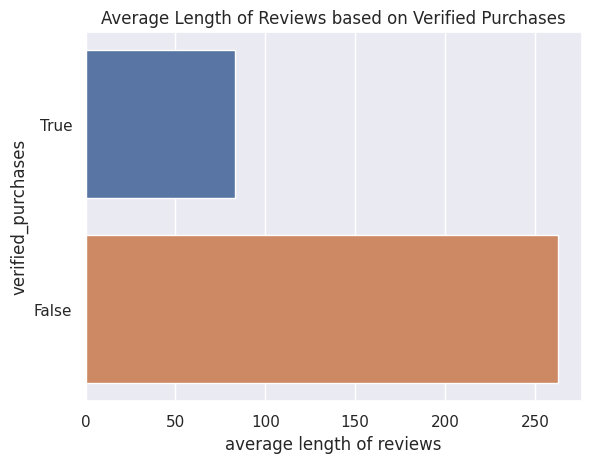

In [24]:
cols = ["verified_purchase", "review_text"]
vprt = df[cols] #making a subset of the dataframe-

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]


#AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

#PLOTTING THE GRAPH
sns.barplot(x = [true_average_length,false_average_length],y = ["True", "False"])
plt.xlabel("average length of reviews")
plt.ylabel("verified_purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()

One of the key takeaways from this graph is the fact that the average length of the false values happened to exceed the ones which are flagged as verified. This can be backed up by several posts, noteably a site which specilizes in catching fraudulent reviews, where it was mentioned that the average length of these reviews tend to exceed the normal length compared to legitimate reviews.

We can see here that the average length of the false VP happen to be more than 250 characters, whilst the true VP happens to be around 50 - 100 characters.

##ATTRIBUTES/COLUMNS TO DROP

In [25]:
#DROP AFOREMENTIONED COLUMNS
df.drop(['matched_keywords', 'time_of_publication'
         ,'manufacturers_response', 'dimension4',
         'dimension5', 'dimension6',
         'is_competitor', 'helpful_review_count',
        'report_date','online_store','brand',
         'category','sub_category', 'market',
        'upc', 'retailer_product_code', 'review_hash_id',
         'url','product_description', 'parent_review',
         'review_type', 'manufacturer', 'dimension1',
         'dimension2','dimension3','dimension4',
         'dimension5', 'dimension7',
         'dimension8'], axis=1, inplace=True)
df.head() #UPDATED DATAFRAME

,review_date,review_rating,review_title,review_text,verified_purchase
0,1/1/2019,5,Dove Men s + Deodorant,"As you get older, you know what you like and w...",True
1,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,1/2/2019,4,Vitamin B12.,Excellent,True
3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,1/2/2019,5,Very handy,Does what is says it does,False


In [26]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df.to_csv('updated_data.csv')

# TEXT DATA EXPLORATION AND PRE-PROCESSING


In [27]:
#LIBRARIES
!pip3 install nltk #installing nltk
sns.set_style('darkgrid')
!pip install wordcloud
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer
import string
import re
import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
#lOADING DATASET
df = pd.read_csv("updated_data.csv",encoding="latin1") #due to special charas should be encoded as latin 1
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
df.head()

,Unnamed: 0,review_date,review_rating,review_title,review_text,verified_purchase
0,0,1/1/2019,5,Dove Men s + Deodorant,"As you get older, you know what you like and w...",True
1,1,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2,1/2/2019,4,Vitamin B12.,Excellent,True
3,3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,4,1/2/2019,5,Very handy,Does what is says it does,False


In [30]:
#DROPPING UNWANTED COLUMN
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        2501 non-null   object
 1   review_rating      2501 non-null   int64 
 2   review_title       2403 non-null   object
 3   review_text        2501 non-null   object
 4   verified_purchase  2501 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 80.7+ KB


RE-CHECK NULL AND DUPLICATES

In [31]:
#CHECK TOTAL DUPLICATE OCCURENCES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  783


In [32]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        1718 non-null   object
 1   review_rating      1718 non-null   int64 
 2   review_title       1652 non-null   object
 3   review_text        1718 non-null   object
 4   verified_purchase  1718 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 55.5+ KB


In [33]:
df.isnull().sum()

review_date           0
review_rating         0
review_title         66
review_text           0
verified_purchase     0
dtype: int64

In [34]:
#DROP review_title
df.drop(["review_title","review_date"], axis=1,
        inplace=True)
df.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


In [35]:
#WORD COUNT
df['total words'] = df['review_text'].apply(lambda i: len(str(i).split(" ")))

#CHARACTER COUNT
df['total characters'] = df['review_text'].str.len() #spaces are included

#STOPWORDS COUNT
sw = set(stopwords.words('english'))
df['total stopwords'] = df['review_text'].str.split().apply(lambda i: len(set(i) & sw))

#PUNCTUATION AND SPECIAL CHARA COUNT
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total punctuations'] = df.review_text.apply(lambda p: count_p(p, string.punctuation))

#UPPERCASE CHARA COUNT
df['total uppercases'] = df['review_text'].str.findall(r'[A-Z]').str.len() #findall - finds all

In [36]:
df.head() #UPDATED

,review_rating,review_text,verified_purchase,total words,total characters,total stopwords,total punctuations,total uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,5,Does what is says it does,False,6,25,4,0,1


In [37]:
df.describe()

,review_rating,total words,total characters,total stopwords,total punctuations,total uppercases
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.330035,177.759022,9.383586,4.434226,3.710128
std,1.123083,35.358484,189.713704,8.605988,5.177685,4.209264
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,41.000000,2.000000,1.000000,1.000000
50%,5.000000,21.000000,113.500000,7.000000,3.000000,2.000000
75%,5.000000,50.000000,268.750000,15.000000,7.000000,5.000000
max,5.000000,287.000000,1624.000000,48.000000,42.000000,54.000000


In [38]:
print(df.groupby("verified_purchase").describe())

                  review_rating                                               \
                          count      mean       std  min  25%  50%  75%  max   
verified_purchase                                                              
False                     900.0  4.315556  1.187805  1.0  4.0  5.0  5.0  5.0   
True                      818.0  4.580685  1.030249  1.0  5.0  5.0  5.0  5.0   

                  total words                                               \
                        count       mean        std  min   25%   50%   75%   
verified_purchase                                                            
False                   900.0  50.373333  36.922107  1.0  23.0  48.0  63.0   
True                    818.0  14.578240  21.338832  1.0   3.0   8.0  17.0   

                         total characters                               \
                     max            count        mean         std  min   
verified_purchase                                           

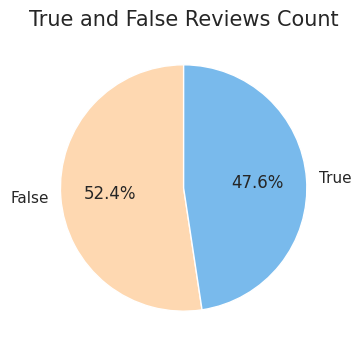

In [39]:
#PIE CHART ON VERFIED PURCHASES -two
colors = ['#FED8B1','#79BAEC']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

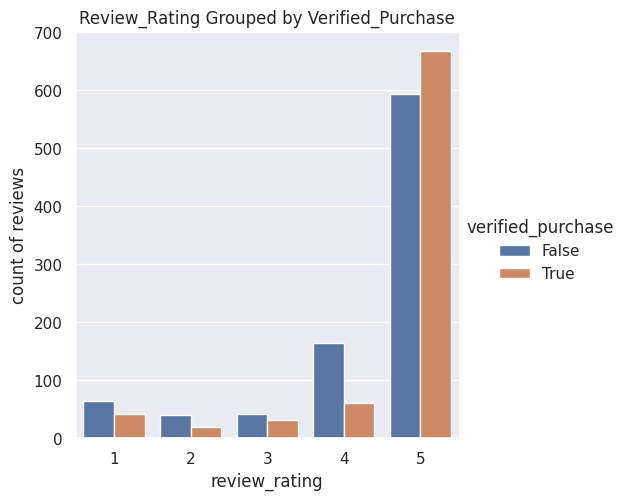

In [40]:
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase", data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

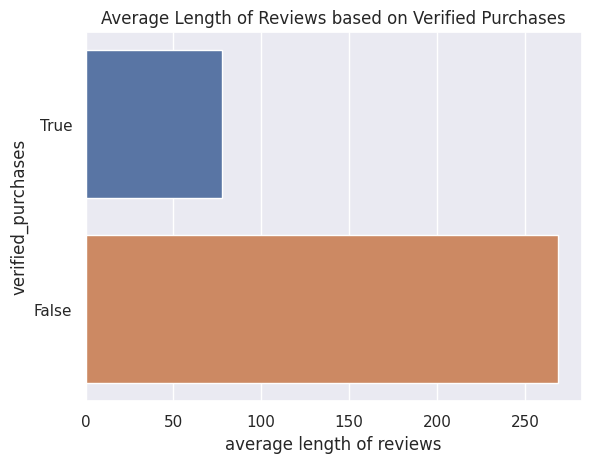

In [41]:
cols = ["verified_purchase", "review_text"]
vprt = df[cols] #making a subset of the dataframe-

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]


#AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

#PLOTTING THE GRAPH

sns.barplot(x = [true_average_length,false_average_length], y = ["True", "False"])
plt.xlabel("average length of reviews")
plt.ylabel("verified_purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()

Pre-Processing

In [42]:
#DROP UNNECESSARY COLUMNS
df.drop(["total words","total characters",
         "total stopwords","total punctuations",
         "total uppercases","review_rating"], axis=1, inplace=True)
df.head()

,review_text,verified_purchase
0,"As you get older, you know what you like and w...",True
1,Three gigantic marmite jars that will last pro...,True
2,Excellent,True
3,A great flavour top - up for slow cooking.,True
4,Does what is says it does,False


In [43]:
#CORRECT SPELLING
df.review_text.apply(lambda i: ''.join(TextBlob(i).correct()))

0       Is you get older, you know what you like and w...
1       Three gigantic marie wars that will last proba...
2                                               Excellent
3              A great flavour top - up for slow cooking.
4                               Does what is says it does
5                             Excellent item.Good for men
6                                Thank you I m very happy
7                                               Beautiful
8                                 Always buy. Fig bottles
9       Always use this product on my heavily mistreat...
10                                            Great value
11      It s not the one in the picture, but gets 5 st...
12      Stem as described, excellent quality, rapid de...
13             Good body wash but not a very strong smell
14                                                  Great
15                                              North it!
16      I remember trying this at a friends house year...
17            

In [44]:
#REMOVING THE STOPWORDS,PUNCTUATIONS, LOWERCASING, AND STEMMING OF THE SENTENCES
def text_preprocessing(text):
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tokens = removed_special_characters.lower().split()

    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []

    for token in tokens:
        if token not in sw:
            cleaned.append(token)

    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)

In [45]:
df['review_text'] = df['review_text'].apply(text_preprocessing)

In [46]:
df['review_text'].head()

0    get older know like suitabl bodi like dove pro...
1    three gigant marmit jar last probabl whole lif...
2                                                excel
3                          great flavour top slow cook
4                                                  say
Name: review_text, dtype: object

In [47]:
#CHECK RARE WORDS
r = pd.Series(' '.join(df['review_text']).split()).value_counts()[-10:]
print("RARE WORDS:")
print(r)

RARE WORDS:
accident     1
chuck        1
emigr        1
salt         1
mushroom     1
fli          1
cult         1
revitalis    1
advantag     1
tendon       1
dtype: int64


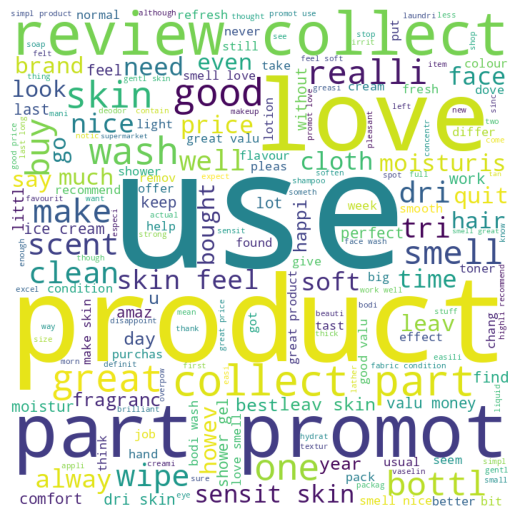

In [48]:
#CHECK TOP COMMON WORDS
words = ''
for i in df["review_text"]:
    tokens = i.split()
    words += " ".join(tokens)+" "


word_cloud = WordCloud(width = 700, height = 700,
                       background_color ='white',
                       min_font_size = 10).generate(words)
plt.figure(figsize = (5, 5))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [49]:
#removing common and rare words
common = pd.Series(' '.join(df['review_text']).split()).value_counts()[:3]
common = list(common.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(df['review_text']).split()).value_counts()[-3:]
rare = list(rare.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))

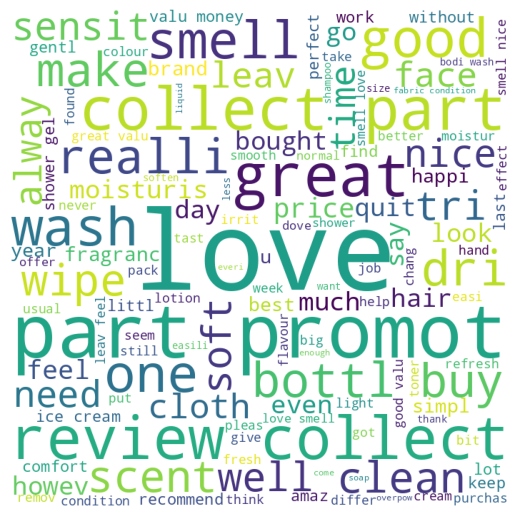

In [50]:
#WORDCLOUD - UPDATED TOP WORDS
words = ''
for i in df["review_text"]:
    tokens = i.split()
    words += " ".join(tokens)+" "


word_cloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 10).generate(words)
plt.figure(figsize = (5, 5))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [51]:
nltk.download('punkt')
df['review_text'].apply(word_tokenize).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [get, older, know, like, suitabl, bodi, like, ...
1    [three, gigant, marmit, jar, last, probabl, wh...
2                                              [excel]
3                    [great, flavour, top, slow, cook]
4                                                [say]
Name: review_text, dtype: object

In [52]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df.to_csv('cleaned_data.csv')

MODEL IMPLEMENTATION AND EVALUATION
This is the stage where the three models are built, optimized and evaluated.

Models used: Multinominal Naive Bayes , Support Vector Machine, Logistic Regression

Evaluation methods used: accuracy, precision, recall, f1_score and confusion matrix

In [53]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [54]:
#lOADING DATASETS
df = pd.read_csv("cleaned_data.csv",encoding="latin1") #due to special charas should be encoded as latin 1

toCheck = pd.read_csv("updated_data.csv",encoding="latin1")
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#DROP EXTRA COLUMNS
df.drop(['Unnamed: 0'], axis=1, inplace=True)
toCheck.drop(['Unnamed: 0'], axis=1, inplace=True)

In [55]:
#CHECKING WHICH ROW IS NULL FROM PRE-PROCESSING
checkNULL = df.isnull()
checkNULL = checkNULL.any(axis=1)
df[checkNULL]

,review_text,verified_purchase
191,NaN,True
523,NaN,True
1072,NaN,True
1111,NaN,True
1230,NaN,True
1316,NaN,True


In [56]:
toCheck = toCheck.drop_duplicates().reset_index(drop=True)

In [57]:
toCheck.iloc[[191,523,1072,1111,1230,1316],[3,4]]

,review_text,verified_purchase
191,A+,True
523,5*,True
1072,very,True
1111,Does what it should,True
1230,A+,True
1316,A*****,True


In [58]:
#DROP THE NULL ROWS
df = df.dropna(how='any',axis=0)

In [59]:
#UPDATED VP VALUES
df["verified_purchase"].value_counts(normalize=True)

False    0.525701
True     0.474299
Name: verified_purchase, dtype: float64

In [60]:
#ASSIGN THE VARIABLES
X = df['review_text'] #input var
y = df['verified_purchase'] #target var

In [61]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    df['review_text'], df['verified_purchase'],test_size=0.4, random_state=42) #40% gives best results, 42 is no of life...

entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685


In [62]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1498, 'price': 1310, 'compar': 343, 'supermarket': 1705, 'good': 761, 'smell': 1563, 'pleasant': 1270, 'need': 1134, 'add': 14, 'small': 1558, 'cloth': 321, 'fresh': 701, 'great': 777, 'moisturis': 1100, 'sensit': 1502, 'love': 1010, 'pour': 1293, 'smaller': 1559, 'bottl': 194, 'make': 1033, 'manag': 1037, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1580, 'nice': 1142, 'fragranc': 696, 'purchas': 1334, 'deliveri': 458, 'cream': 399, 'handwash': 802, 'cheaper': 282, 'hand': 799, 'better': 155, 'liquid': 989, 'oh': 1174, 'wing': 1916, 'dove': 516, 'kitchen': 941, 'bathroom': 131, 'shower': 1527, 'room': 1436, 'recommend': 1378, 'highli': 831, 'star': 1636, 'simpl': 1537, 'gel': 728, 'like': 978, 'glue': 754, 'hard': 806, 'rub': 1444, 'slip': 1555, 'bath': 130, 'goe': 757, 'smoothli': 1569, 'easili': 541, 'wast': 1884, 'leav': 965, 'feel': 645, 'silki': 1535, 'soft': 1579, 'scenti': 1477, 'review': 1419, 'collect': 328, 'promot': 1322, 'exc

In [63]:
#IMPLEMENTING AND RUNNNING MNB MODEL - COUNT
mnb1 = MultinomialNB()
mnb1.fit(train_c, y_train)
prediction = mnb1.predict(test_c)

In [64]:
#EVALUATION
mnb_a1 = accuracy_score(y_test, prediction)*100
mnb_p1 = precision_score(y_test, prediction)* 100
mnb_r1 = recall_score(y_test, prediction)*100
mnb_f11 = f1_score(y_test, prediction)*100

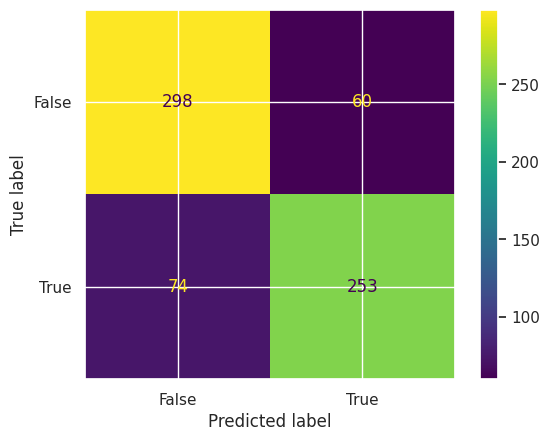

In [65]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb1.classes_)
display.plot()

Support Vector Machine model

In [66]:
#IMPLEMENTING AND RUNNNING SVM MODEL - COUNT
svm1 = SVC(kernel='linear')
svm1.fit(train_c, y_train)
prediction = svm1.predict(test_c)

In [67]:
#EVALUATION
svm_a1 = accuracy_score(y_test, prediction)*100
svm_p1 = precision_score(y_test, prediction)* 100
svm_r1 = recall_score(y_test, prediction)*100
svm_f11 = f1_score(y_test, prediction)*100

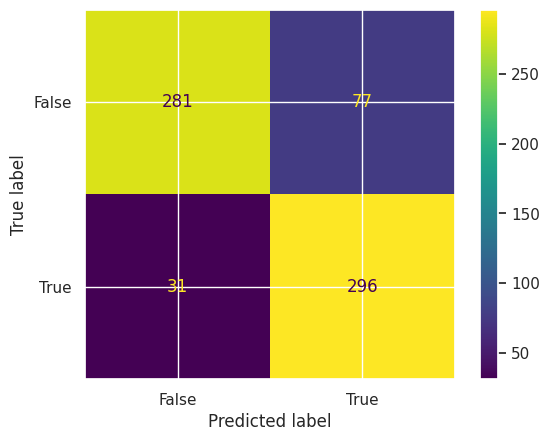

In [68]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm1.classes_)
display.plot()

Logistic Regression model

In [69]:
#IMPLEMENTING AND RUNNNING LR MODEL - COUNT
lr1 = LogisticRegression()
lr1.fit(train_c, y_train)
prediction = lr1.predict(test_c)

In [70]:
#EVALUATION
lr_a1 = accuracy_score(y_test, prediction)*100
lr_p1 = precision_score(y_test, prediction)* 100
lr_r1 = recall_score(y_test, prediction)*100
lr_f11 = f1_score(y_test, prediction)*100

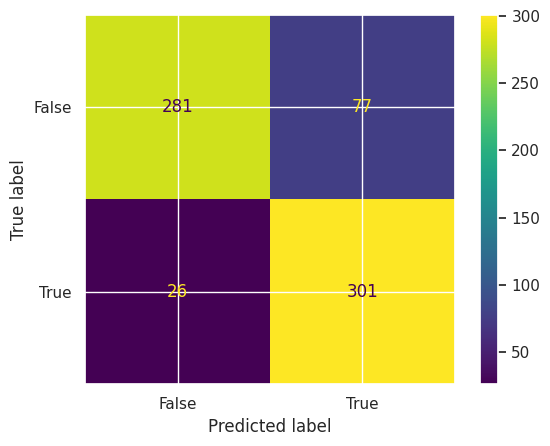

In [71]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_)
display.plot()


In [72]:
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1498, 'price': 1310, 'compar': 343, 'supermarket': 1705, 'good': 761, 'smell': 1563, 'pleasant': 1270, 'need': 1134, 'add': 14, 'small': 1558, 'cloth': 321, 'fresh': 701, 'great': 777, 'moisturis': 1100, 'sensit': 1502, 'love': 1010, 'pour': 1293, 'smaller': 1559, 'bottl': 194, 'make': 1033, 'manag': 1037, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1580, 'nice': 1142, 'fragranc': 696, 'purchas': 1334, 'deliveri': 458, 'cream': 399, 'handwash': 802, 'cheaper': 282, 'hand': 799, 'better': 155, 'liquid': 989, 'oh': 1174, 'wing': 1916, 'dove': 516, 'kitchen': 941, 'bathroom': 131, 'shower': 1527, 'room': 1436, 'recommend': 1378, 'highli': 831, 'star': 1636, 'simpl': 1537, 'gel': 728, 'like': 978, 'glue': 754, 'hard': 806, 'rub': 1444, 'slip': 1555, 'bath': 130, 'goe': 757, 'smoothli': 1569, 'easili': 541, 'wast': 1884, 'leav': 965, 'feel': 645, 'silki': 1535, 'soft': 1579, 'scenti': 1477, 'review': 1419, 'collect': 328, 'promot': 1322, 'exc

Multinomial Naive Bayes model


In [73]:
#IMPLEMENTING AND RUNNING MNB MODEL - TFIDF
mnb2 = MultinomialNB()
mnb2.fit(train_tf, y_train)
prediction = mnb2.predict(test_tf)

In [74]:
#EVALUATION
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction)* 100
mnb_r2 = recall_score(y_test, prediction)*100
mnb_f12 = f1_score(y_test, prediction)*100

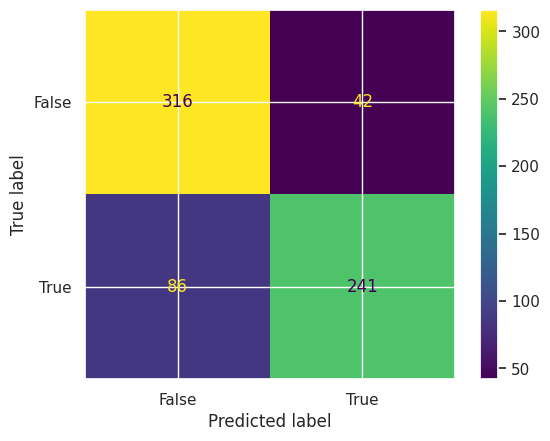

In [75]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb2.classes_)
display.plot()


Support Vector Machine model

In [76]:
#IMPLEMENTING AND RUNNING SVM MODEL - TFIDF
svm2 = SVC(kernel='linear')
svm2.fit(train_tf, y_train)
prediction = svm2.predict(test_tf)

In [77]:
#EVALUATION
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction)* 100
svm_r2 = recall_score(y_test, prediction)*100
svm_f12 = f1_score(y_test, prediction)*100

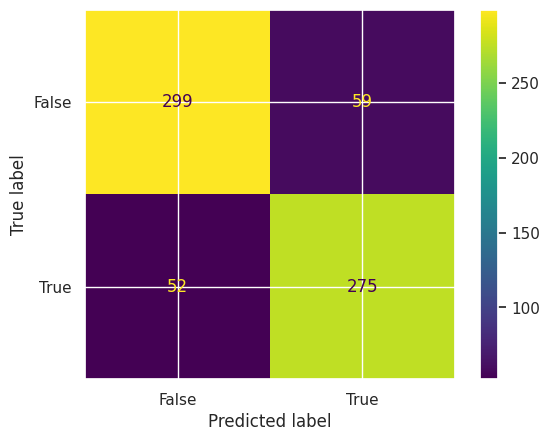

In [78]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_)
display.plot()

Logistic Regression model

In [79]:
#IMPLEMENTATION AND RUNNING LR MODEL - TFIDF
lr2 = LogisticRegression()
lr2.fit(train_tf, y_train)
prediction = lr2.predict(test_tf)

In [80]:
#EVALUATION
lr_a2 = accuracy_score(y_test, prediction)*100
lr_p2 = precision_score(y_test, prediction)* 100
lr_r2 = recall_score(y_test, prediction)*100
lr_f12 = f1_score(y_test, prediction)*100

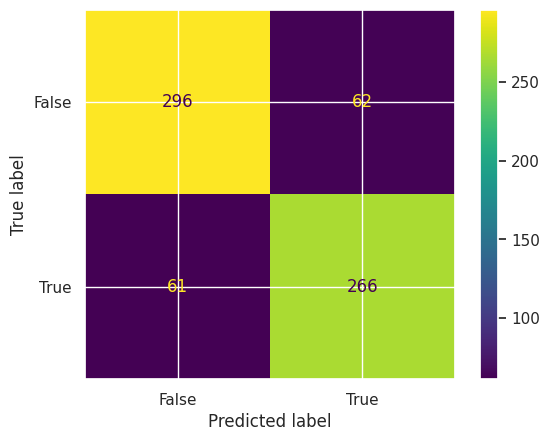

In [81]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr2.classes_)
display.plot()

COMPARING ACCURACY

In [82]:
model_accuracy={'MNB': [round(mnb_a1), round(mnb_a2)],
                'SVM': [round(svm_a1), round(svm_a2)],
                'LR': [round(lr_a1), round(lr_a2)]
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
ma

,MNB,SVM,LR
Count Vectorizer,80,84,85
Tfidf Vectorizer,81,84,82


COMPARING PRECISION

In [83]:
model_precision={'MNB': [round(mnb_p1), round(mnb_p2)],
                'SVM': [round(svm_p1), round(svm_p2)],
                'LR': [round(lr_p1), round(lr_p2)]
               }
mp = pd.DataFrame(model_precision, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mp

,MNB,SVM,LR
Count Vectorizer,81,79,80
Tfidf Vectorizer,85,82,81


COMPARING RECALL

In [84]:
model_recall={'MNB': [round(mnb_r1), round(mnb_r2)],
                'SVM': [round(svm_r1), round(svm_r2)],
                'LR': [round(lr_r1), round(lr_r2)]
               }
mr = pd.DataFrame(model_recall, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mr

,MNB,SVM,LR
Count Vectorizer,77,91,92
Tfidf Vectorizer,74,84,81


COMPARING F1 SCORE

In [85]:
model_f1={'MNB': [round(mnb_f11), round(mnb_f12)],
                'SVM': [round(svm_f11), round(svm_f12)],
                'LR': [round(lr_f11), round(lr_f12)]
               }
mf1 = pd.DataFrame(model_f1, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mf1

,MNB,SVM,LR
Count Vectorizer,79,85,85
Tfidf Vectorizer,79,83,81


In [86]:
#SAVING THE BEST MODEL WITH ITS RESPECTIVE VECTORIZER
pickle.dump(lr1, open('best_model.pkl', 'wb'))
pickle.dump(count_vectorizer, open('count_vectorizer.pkl', 'wb'))